In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math
import numpy as np
import networkx as nx
from operator import itemgetter

In [2]:
path = "../sna-project-2022_cosmo_d-arrigo_esposito/edges.csv"
path_all = "../sna-project-2022_cosmo_d-arrigo_esposito/questions_2020_2022.csv"
path_nodes = "../sna-project-2022_cosmo_d-arrigo_esposito/nodes.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df

,Source,Target,Count
0,macos,python,14
1,macos,zsh,57
2,macos,compression,3
3,macos,tar,3
4,macos,crash,3
...,...,...,...
63395,blob-storage,azcopy,1
63396,raspberry,apm,1
63397,input-method,chinese-input-method,1
63398,input-method,ime-quick,1


In [5]:
G = nx.read_edgelist(path, comments = "S", delimiter = ",", data=(("Count", int),))

In [6]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key = itemgetter(1), reverse = True)
print(" ---- Top 20 nodes by degree ----")
for d in sorted_degree[:20]:
    print("\t" + str(d))

 ---- Top 20 nodes by degree ----
	('windows-10', 1901)
	('linux', 1762)
	('windows', 1686)
	('ubuntu', 996)
	('networking', 891)
	('macos', 774)
	('command-line', 687)
	('google-chrome', 576)
	('windows-7', 569)
	('debian', 558)
	('powershell', 556)
	('hard-drive', 544)
	('bash', 522)
	('mac', 508)
	('usb', 492)
	('ssh', 489)
	('boot', 479)
	('wireless-networking', 474)
	('windows-11', 467)
	('security', 463)


In [7]:
nodes = []
others = []
for i in range(len(sorted_degree)):
    if i<10002:
        nodes.append(sorted_degree[i][0])
    else:
        others.append(sorted_degree[i][0])

In [8]:
new_df = df[(df["Source"].isin(nodes)) & (df["Target"].isin(nodes))] 

In [9]:
new_df.to_csv("../sna-project-2022_cosmo_d-arrigo_esposito/edges_10K.csv",  index=False)

In [10]:
new_df = pd.DataFrame({"Id": nodes})
new_df.to_csv("../sna-project-2022_cosmo_d-arrigo_esposito/nodes_10K.csv", index=False)

In [11]:
other_df = pd.DataFrame({"Id": others})
other_df.to_csv("../sna-project-2022_cosmo_d-arrigo_esposito/nodes_3K.csv", index=False)

In [32]:
df_questions["Tags"][0].split("|-|")[:-1]

['macos', 'python', 'zsh', 'compression', 'tar']

In [13]:
df_questions = pd.read_csv(path_all)

In [14]:
all_string = ""
for i in range(len(df_questions)):
    ll = df_questions["Tags"][i].split("|-|")[:-1]
    for tg in ll:
        all_string = all_string + tg + " "

In [15]:
# Total number of tags
len(all_string.split())

153631

In [16]:
count = 0
for i in range(len(df_questions)):
    ll = df_questions["Tags"][i].split("|-|")[:-1]
    count = count + len(ll)

In [17]:
#Average number of tags per question
count/len(df_questions)

3.07262

In [18]:
len(set(all_string.split()))

4182

In [19]:
img_path = "../Images"

FileNotFoundError: [Errno 2] No such file or directory: '../Images/tag_cloud.png'

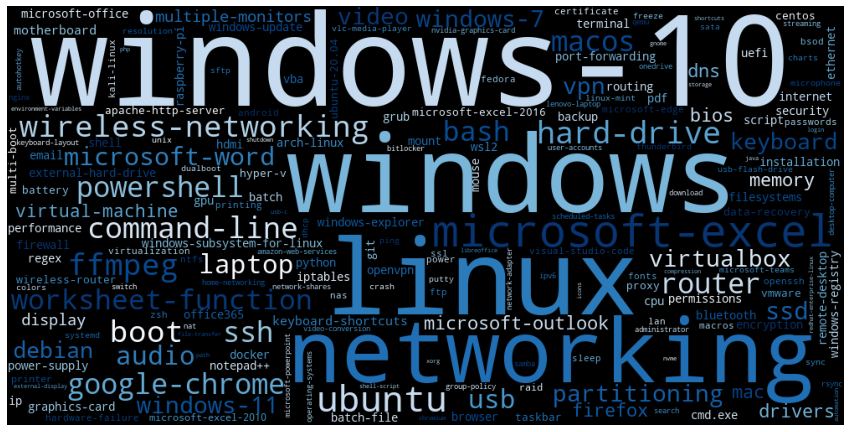

In [20]:
from collections import Counter
word_could_dict=Counter(all_string.split())
wordcloud = WordCloud(width = 1000, height = 500 , colormap="Blues").generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.show()
plt.savefig(img_path+'/tag_cloud.png', bbox_inches='tight')
plt.close()

In [21]:
word_could_dict.most_common(6)


[('windows-10', 8979),
 ('windows', 6207),
 ('linux', 5952),
 ('networking', 4138),
 ('microsoft-excel', 3418),
 ('ubuntu', 2169)]

In [22]:
for i in range(1, 4):
    print(word_could_dict.most_common()[-i])

('redshift', 1)
('gunzip', 1)
('x265', 1)


In [23]:
from collections import Counter
word_could_dict=Counter(all_string.split())

In [24]:
word_could_dict

Counter({'macos': 1235,
         'python': 371,
         'zsh': 222,
         'compression': 127,
         'tar': 62,
         'crash': 168,
         'windows-10': 8979,
         'memory': 652,
         'docker': 436,
         'resources': 5,
         'windows': 6207,
         'uninstall': 78,
         'motherboard': 550,
         'powershell': 1216,
         'ecc': 10,
         'command-line': 1341,
         '7-zip': 98,
         'gui': 47,
         'remote-desktop': 473,
         'youtube': 85,
         'icons': 127,
         'google-chrome': 1299,
         'security': 517,
         'javascript': 74,
         'events': 11,
         'frontend': 4,
         'internet': 292,
         'cookies': 54,
         'linux': 5952,
         'audio': 980,
         'duplicate': 25,
         'wav': 11,
         'stereo': 9,
         'dns': 653,
         'domain-name': 22,
         'tld': 4,
         'registrar': 3,
         'hidden-file': 25,
         'firefox': 654,
         'tabs': 44,
         'b

In [25]:
less_10=0
less_100 =0
over_1000=0
tot_apperance = 0
for i, k in enumerate(word_could_dict):
    if word_could_dict[k] < 100:
        if word_could_dict[k] < 10:
            less_10 += 1
        less_100 +=1
    if word_could_dict[k] > 1000:
        over_1000+=1
    tot_apperance +=1

In [26]:
less_10/tot_apperance

0.6446676231468197

In [27]:
less_100/tot_apperance

0.9414155906264945

In [28]:
over_1000/tot_apperance

0.004543280726924916

In [29]:
over_1000

19

In [30]:
node = [i for i in range(0,len(sorted_degree))]
count = []
for i in sorted_degree:
    count.append(i[1])

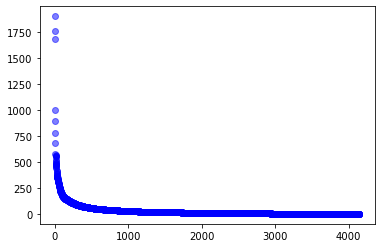

In [31]:
plt.scatter(node, count, c="b", alpha=0.5, )